# Modeling with decision trees

In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#reading the data
data=pd.read_csv('Data/DirectMarketing_Cln_Classification.csv')

In [14]:
#shape of the data
data.shape

(1000, 15)

In [15]:
#first five rows of the data
data.head()

,Salary,Children,Catalogs,Middle,Old,Young,Female,Male,Own,Rent,Married,Single,Close,Far,Amt_Spnt_Class
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,Low
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,Med
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,Low
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,High
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,Med


In [16]:
#checking missing values in the data
data.isnull().sum()

Salary            0
Children          0
Catalogs          0
Middle            0
Old               0
Young             0
Female            0
Male              0
Own               0
Rent              0
Married           0
Single            0
Close             0
Far               0
Amt_Spnt_Class    0
dtype: int64

In [17]:
#seperating independent and dependent variables
X = data.drop(['Amt_Spnt_Class'], axis=1)
y = data['Amt_Spnt_Class']


In [19]:
print(X)

     Salary  Children  Catalogs  Middle  Old  Young  Female  Male  Own  Rent  \
0     47500         0         6       0    1      0       1     0    1     0   
1     63600         0         6       1    0      0       0     1    0     1   
2     13500         0        18       0    0      1       1     0    0     1   
3     85600         1        18       1    0      0       0     1    1     0   
4     68400         0        12       1    0      0       1     0    1     0   
..      ...       ...       ...     ...  ...    ...     ...   ...  ...   ...   
995   19400         1        18       0    0      1       1     0    0     1   
996   40500         1        18       1    0      0       0     1    0     1   
997   44800         0        24       0    1      0       0     1    1     0   
998   79000         2        18       1    0      0       0     1    1     0   
999   53600         1        24       0    0      1       0     1    0     1   

     Married  Single  Close  Far  
0   

In [20]:
print(y)

0       Low
1       Med
2       Low
3      High
4       Med
       ... 
995     Low
996     Med
997     Med
998     Low
999     Med
Name: Amt_Spnt_Class, Length: 1000, dtype: object


In [21]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [22]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [23]:
# distribution in training set
y_train.value_counts(normalize=True)

Low     0.501333
High    0.249333
Med     0.249333
Name: Amt_Spnt_Class, dtype: float64

In [24]:
# distribution in validation set
y_valid.value_counts(normalize=True)

Low     0.500
High    0.252
Med     0.248
Name: Amt_Spnt_Class, dtype: float64

In [25]:
#shape of training set
X_train.shape, y_train.shape

((750, 14), (750,))

In [26]:
#shape of validation set
X_valid.shape, y_valid.shape

((250, 14), (250,))

In [43]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [44]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [46]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [47]:
#checking the training score
dt_model.score(X_train, y_train)

0.9973333333333333

In [48]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.732

In [49]:
#predictions on validation set
dt_model.predict(X_valid)

array(['Low', 'Low', 'Med', 'Low', 'Low', 'Low', 'Low', 'Low', 'Med',
       'Med', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Med', 'Low',
       'Med', 'Low', 'Low', 'Med', 'Low', 'High', 'Low', 'Low', 'Low',
       'High', 'Med', 'Med', 'Low', 'Med', 'Low', 'High', 'High', 'Low',
       'Low', 'Med', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Med', 'Med', 'Low', 'Low', 'Med',
       'Low', 'Low', 'Med', 'High', 'Low', 'Low', 'Low', 'Med', 'High',
       'Low', 'High', 'High', 'Low', 'Med', 'High', 'Low', 'Low', 'Low',
       'Med', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'High',
       'Med', 'Low', 'Low', 'Low', 'Med', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'Med', 'Low', 'Med', 'High', 'Low', 'Med', 'Low',
       'Low', 'High', 'Low', 'High', 'Med', 'Med', 'High', 'Med', 'Low',
       'Med', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Med', 'High', '

In [50]:
dt_model.predict_proba(X_valid)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1

In [51]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [52]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_valid, y_new)

0.0

## Changing the max_depth

In [55]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [56]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.620000,0.600
1,2,0.660000,0.696
2,3,0.710667,0.704
3,4,0.765333,0.740
4,5,0.801333,0.752


No handles with labels found to put in legend.


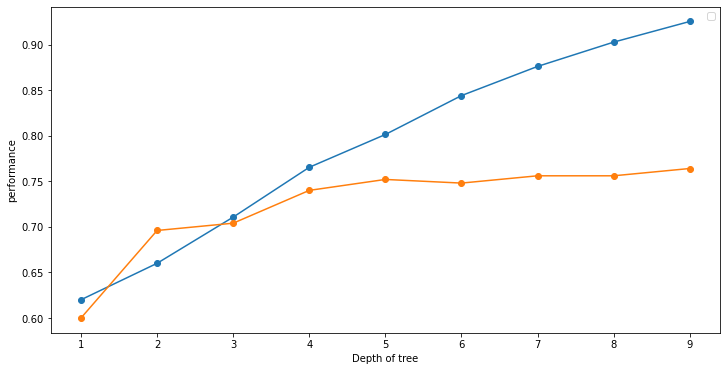

In [57]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [58]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [59]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [60]:
#Training score
dt_model.score(X_train, y_train)

0.8186666666666667

In [61]:
#Validation score
dt_model.score(X_valid, y_valid)

0.756

In [62]:
from sklearn import tree

In [63]:
!pip install graphviz

In [64]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)

In [65]:
!dot -Tpng tree.dot -o tree.png

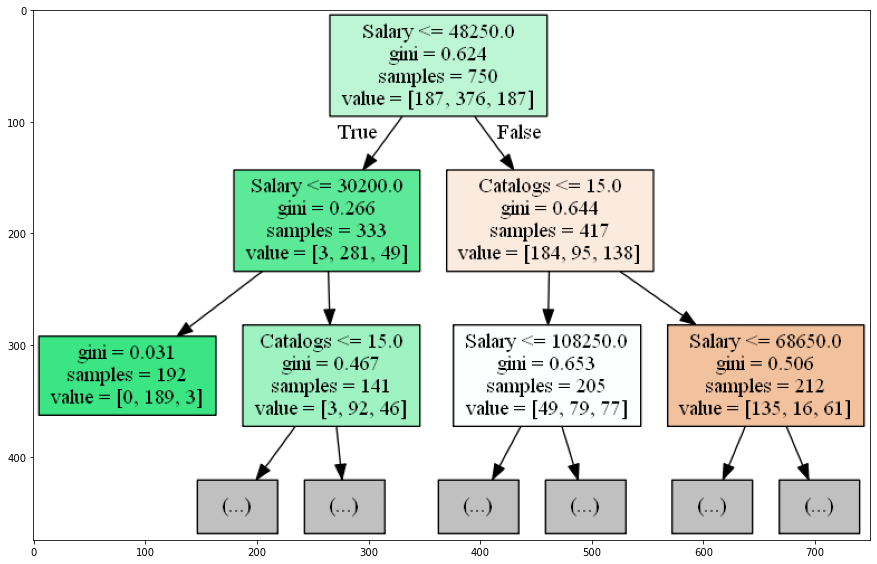

In [66]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)